# Experiment 6: Semiconductor Diodes and a Rectifier Circuit

Date: Oct. 17 2025

Name: Mufaro Machaya

Partner: Omar Hui

Student ID: 19011808

In [1]:
from common import *

## Introduction Notes

**Learning Goals:**
> - know the I-V characteristics of a diode, forward and re-
verse biased
> - know how to fit to a model for this IV characteristic
> - gain experience designing and building a rectifier

**Experiment Overview**

- First round: measuring the current vs. input voltage across the diode for a variable voltage
- Second round: switch to a sine wave from the wave generator as the input voltage and measure $V_R(t)$

# Part 1 - Resistor-Diode Circuit

**Notes**

We need to make this circuit:

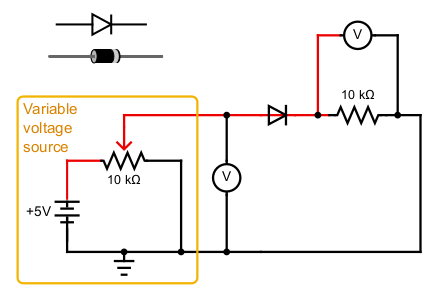

and we built

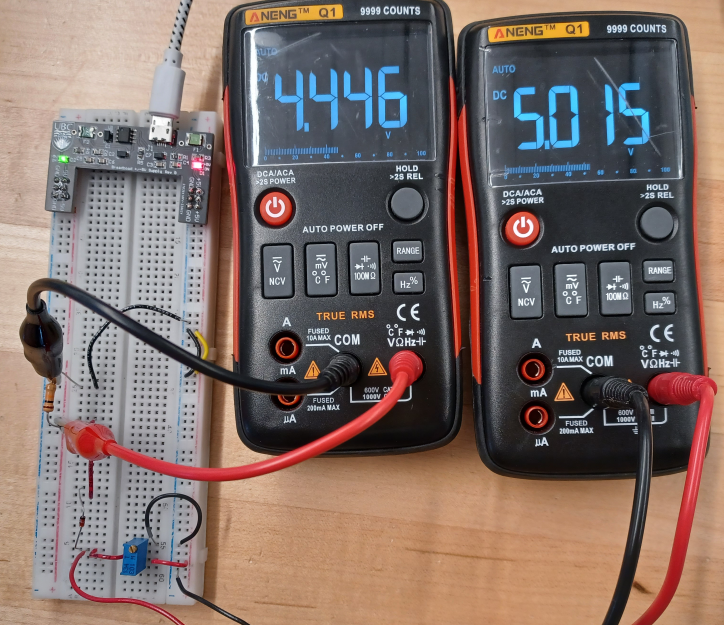

We can measure the the input voltage $V_{in}$ with the right DMM and the voltage drop over the resistor $V_R$ with the left DMM.

- The input voltage is altered by increasing and decreasing the variable resistor.
- As the $V_{in}$ decreases, $V_{R}$ decreases, and they seem to decrease in tandem (perhaps linearly) but there is a clear region around $V_{in}\approx 4.5$ V where $V_R$ decreases rapidly--faster than $V_{in}$. 

We can calculate the current over the diode as $I_{D} = I_{R} =  \frac{V_{R}}{R}$.

**Uncertainty:**

For the DMM at max. precision $0.01$ $k\Omega$ of resistance, the uncertainty function $u[R](R)$ [1](https://www.manualslib.com/manual/1596837/Aneng-Q1.html?page=23#manual) is
$$u[R](R) = R \times 0.5\% + 3 \times 0.01 \text{ } k\Omega$$
and for the DMM at max. precision $0.001$ V, the uncertainty function $u[V](V)$ [2](https://www.manualslib.com/manual/1596837/Aneng-Q1.html?page=22#manual) is
$$u[V](V) = V \times 0.5\% + 3 \times 0.001.$$

Then, the uncertainty in current would be

$$u[I] = I \sqrt{\left(\frac{u[R]}{R}\right)^2 + \left(\frac{u[V]}{V}\right)^2}$$

and the uncertainty in the diode voltage would be

$$u[V_D] = \sqrt{u[V_{in}]^2 + u[V_{T}]^2}$$

Furthermore, for the uncertainty in capacitance (for part 2) at a max. precision of 0.1 $nF$, the uncertainty function $u[C](C)$ [3](https://www.manualslib.com/manual/1596837/Aneng-Q1.html?page=24#manual) is

$$u[C](C) = C \times 2.0\% + 5 \times 0.1.$$

In [2]:
def record_resistance(resistance):
    resistance_uncert = resistance * 0.5/100 + 3 * 0.01
    print(f'Resistance: {resistance} +/- {resistance_uncert:.1} kOhm')
    return resistance * 1e3, resistance_uncert * 1e3

def calculate_voltage_uncert(voltage):
    voltage_uncert = voltage * (0.5/100) + 3 * 0.001
    return voltage_uncert

def calculate_current(r, dr, v, dv):
    current = v / r
    current_uncert = \
        current * np.sqrt((dr / r) ** 2 + (dv / v) ** 2)
    return current, current_uncert

def record_capacitance(capacitance):
    capacitance_uncert = capacitance * 2 / 100 + 5 * 0.1
    print(f'Capacitance: {capacitance} +/- {capacitance_uncert:.1f} nF')
    return capacitance * 1e-9, capacitance_uncert * 1e-9

The set resistor has $R=9.89 \pm 0.08$ $k\Omega$ of resistance.

In [3]:
resistance, resistance_uncert = record_resistance(9.89)

Resistance: 9.89 +/- 0.08 kOhm


**Measurement Plan:**
- We'll measure the voltage over the resistor $V_R$ (with uncertainty) alongside the input voltage $V_{in}$.
- From the input voltage and voltage drop over the resistor, we can get the current $I = V_R/R$ and the diode voltage $V_{D}=V_{in}-V_{R}$.
- We'll take at least 10 datapoints of this from $V\approx 5$ V to $V \approx 1$ V (to ensure that the DMM stays in units of $V$ for ease of not having to change the uncertainty calculation).

In [4]:
vin = np.array([4.996, 4.970, 4.904, 4.679, 4.448, 4.273, 4.151, 3.975, 3.724, 3.555, 3.364, 3.171, 3.011, 2.863, 2.661, 2.498, 2.340, 2.140, 1.994, 1.806, 1.670, 1.577, 1.509, 1.387])
vr  = np.array([4.427, 4.402, 4.336, 4.114, 3.886, 3.712, 3.591, 3.418, 3.170, 3.004, 2.816, 2.627, 2.471, 2.324, 2.126, 1.967, 1.812, 1.617, 1.476, 1.294, 1.164, 1.075, 1.010, 0.894])

In [5]:
vin_uncert = calculate_voltage_uncert(vin)
vr_uncert  = calculate_voltage_uncert(vr)

In [6]:
vd = vin - vr
vd_uncert = np.sqrt(vin_uncert ** 2 + vr_uncert ** 2)

In [7]:
current, current_uncert = calculate_current(resistance, resistance_uncert, vr, vr_uncert)

In [8]:
dataset_rd = Dataset(
    x  = vd,
    dx = vd_uncert,
    y  = current,
    dy = current_uncert
)
sort_dataset(dataset_rd)

gopts_rd = GraphingOptions(
    x_label='$V_D$',
    y_label='$I$',
    x_units='V',
    y_units='Amp.'
)

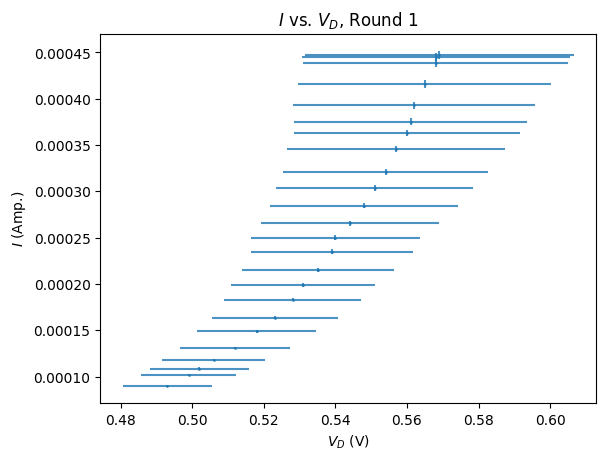

In [9]:
plot_dataset(dataset_rd, gopts_rd)

**Observations:**

- $u[V_{D}]$ seems incredibly high and clearly overestimated. For now, I'll just ignore it to fit it later.
- (Post-Lab) I think it's okay to leave the high $u[V_D]$ as-is, as it won't affect the fit. What I wonder, however, is the relatively low $u[I]$, because that could make performing a good fit difficult. 

The present temperature in-lab is $T = 22.4$ C or $295.55$ K.

The model is 
$$I(V_D) = I_0 \left[\exp(\frac{eV_{D}}{k_B T})-1 \right]$$
with the free parameter $A=I_0$ and $B=k_B/e$:
$$I(V_D) = A \left[\exp(V_{D} \frac{B}{T})-1 \right]$$


In [10]:
temp = 295.55
boltzmann_constant = 1.380649e-23
electron_charge = 1.60217663e-19

print(boltzmann_constant / electron_charge)

8.617333283659244e-05


(Post-lab) I'm expecting $k_B/e$ of roughly $8.6\times 10^{-5}$ $\frac{m^2 kg}{s^2 K C}$ and a reverse saturation current of $I_0=10^{-6}$ to begin with. $k_B/e$ is an obvious guess, and I'm assuming $I_0$ from knowing that it is probably a very small value (as, from what I can understand, it's the very small current that would flow through the diode in a reverse-bias).

In [11]:
model_rd = CustomFitModel(
    fit_function   = lambda diode_voltage, rs_current, boltz_elec: \
        rs_current * (np.exp(diode_voltage * (boltz_elec / temp)) - 1),
    initial_params = { 'RS Current': 1e-6, 'kB/e': boltzmann_constant / electron_charge }
)

In [12]:
results_rd = autofit(dataset_rd, model_rd, gopts_rd)
print_results(model_rd, results_rd)

+---------------+--------------+---------------+
| Measurement   |        Value |   Uncertainty |
+===============+==============+===============+
| RS Current    |    2.422e-09 |     1.215e-10 |
+---------------+--------------+---------------+
| kB/e          | 6299         |    27.38      |
+---------------+--------------+---------------+
Chi^2 = 2.115


(Post-Lab) The model obtained $\chi^2 = 2.115$, indicating that it's a good fit, but many of these values are incredibly off. 

> Describe how and where your measurements deviate from
the theory given by Eqn. 1.

- It obtained $I_0=2.422 \pm 0.122$ $nA$, and I had guessed on a scale of $\mu A$, so my initial guess was off by a magnitude of $10^3$.
- It obtained $k_B/e = 6229 \pm 27$ $\frac{m^2 kg}{s^2 K C}$, which undoubtedly shows that the model has a problem in one way or another, as we know that this value is a universal constant, so there's a deviation from reality here.

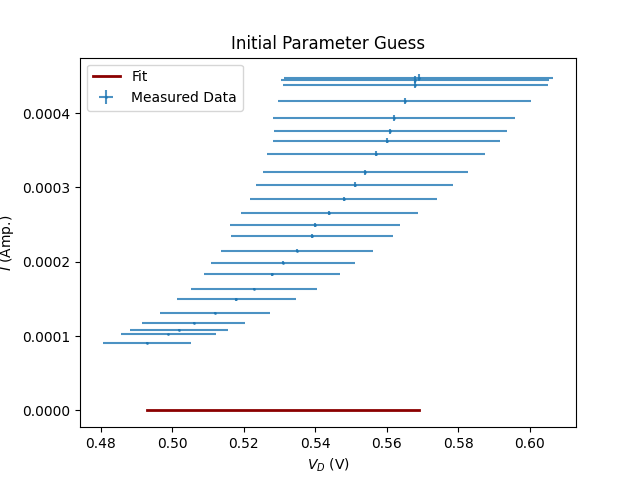

In [13]:
display(results_rd.initial_guess_graph)

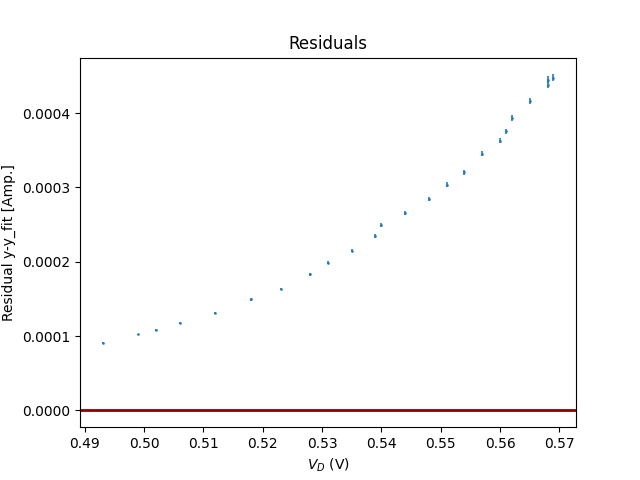

In [14]:
display(results_rd.initial_guess_residuals_graph)

(Post-Lab) **Observation:** This proves my previous point: my initial guesses were completely wrong.

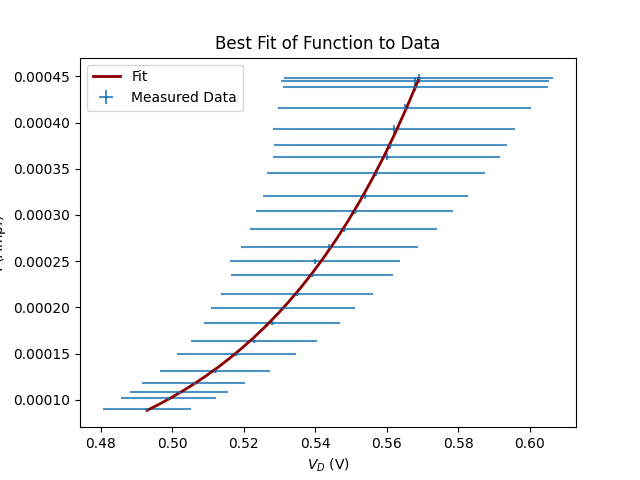

In [15]:
display(results_rd.autofit_graph)

(Post-Lab) **Observation:** However, the autofit seems to match the data quite will from visual inspection, and this is corroborated by the $\chi^2$. Perhaps the residuals graph will have more insight.

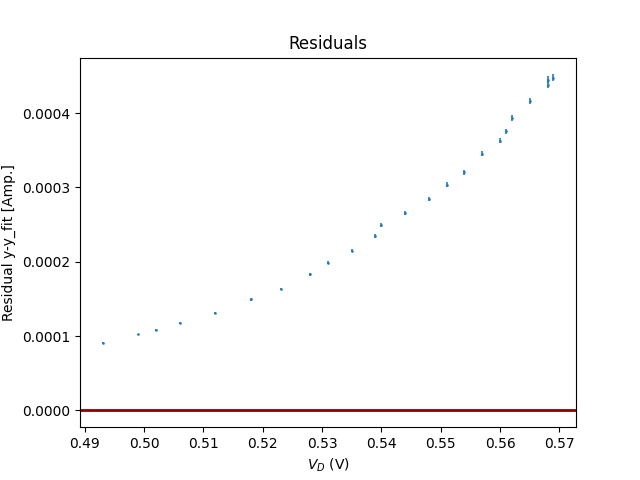

In [16]:
display(results_rd.autofit_residuals_graph)

(Post-Lab) **Observation:** The residuals graph, however, shows that the model is greatly underestimating the data, and there's clearly still a pattern to the residuals, so it's not quite there.

### Reducing the Fitting Range

> Reduce the fitting range to see how this effects the fitted parameters and quality of the fit.

(Post-Lab) I'll reduce it to remove the tail end of the dataset, where there seems to be a bit of an inconsistent trend, and then I'll see if there's any difference in the data.

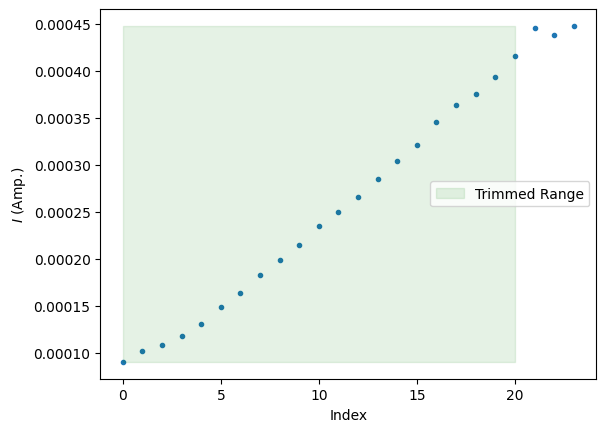

In [17]:
dataset_rd_trimmed = trim_dataset(
    dataset_rd, 
    trim_range=(0,20), 
    graphing_options=gopts_rd, 
    plot=True
)

In [18]:
results_rd_2 = autofit(dataset_rd_trimmed, model_rd, gopts_rd)
print_results(model_rd, results_rd_2)

+---------------+--------------+---------------+
| Measurement   |        Value |   Uncertainty |
+===============+==============+===============+
| RS Current    |    2.567e-09 |     1.522e-10 |
+---------------+--------------+---------------+
| kB/e          | 6266         |    32.73      |
+---------------+--------------+---------------+
Chi^2 = 2.284


(Post-Lab) **Observations:** The model yielded the exact same values, even after trimming the dataset (thus why I won't bother to analyze the graphs). I suppose this is to be expected as the trend in the data seems fairly consistent. This is likely the result of my previous strategy of measuring only in the same range of voltages (~1 to 4 volts) such taht the data is consistent, so there's no data at incredibly low voltages (or reverse voltages), resulting in a poor estimate of $I_0$ (and subsequently, a poor estimate of $k_B/e$).

> What is your conclusion about the measurements and how well the data is described by the simple theory given by Eqn 1?

(Post-Lab) The fits show that this situation holds one-of-two results: either the model was incorrect or this lab was performed incorrectly due to the data not covering a wide-enough range to accurately represent the truth. As one suggestion, visual inspection of the above graphs shows that it may be worth exploring linearizing the graph and analyzing from there.

> Under what circumstances does this function describe the data reasonably well?

(Post-Lab) This is somewhat inconclusive given the poor results of my experiment, but a good guess I can give is that it would describe the data best at either a higher voltage or higher resistance, as $10$ $k\Omega$ and $1-5$ V is somewhat low.

## Part 2 - Rectifier (RC-Diode) Circuit

**Measurement Plan**

> Apply a 60 Hz sinusoidal voltage to the diode with an amplitude of 2.5V and no offset Monitor
the input voltage signal Vin (t) (the voltage across both the diode and resistor) on CH1 of the
scope and output signal voltage Vr (t) across the 1 kOhm resistor on CH2 of the scope. The
scope inputs should be DC coupled (this option is found inside the CH1 and CH2 menus). Save
data sets of both signals.

I need to build the following circuit:

![](circuit2.png)

The measurement circuit is setup as follows

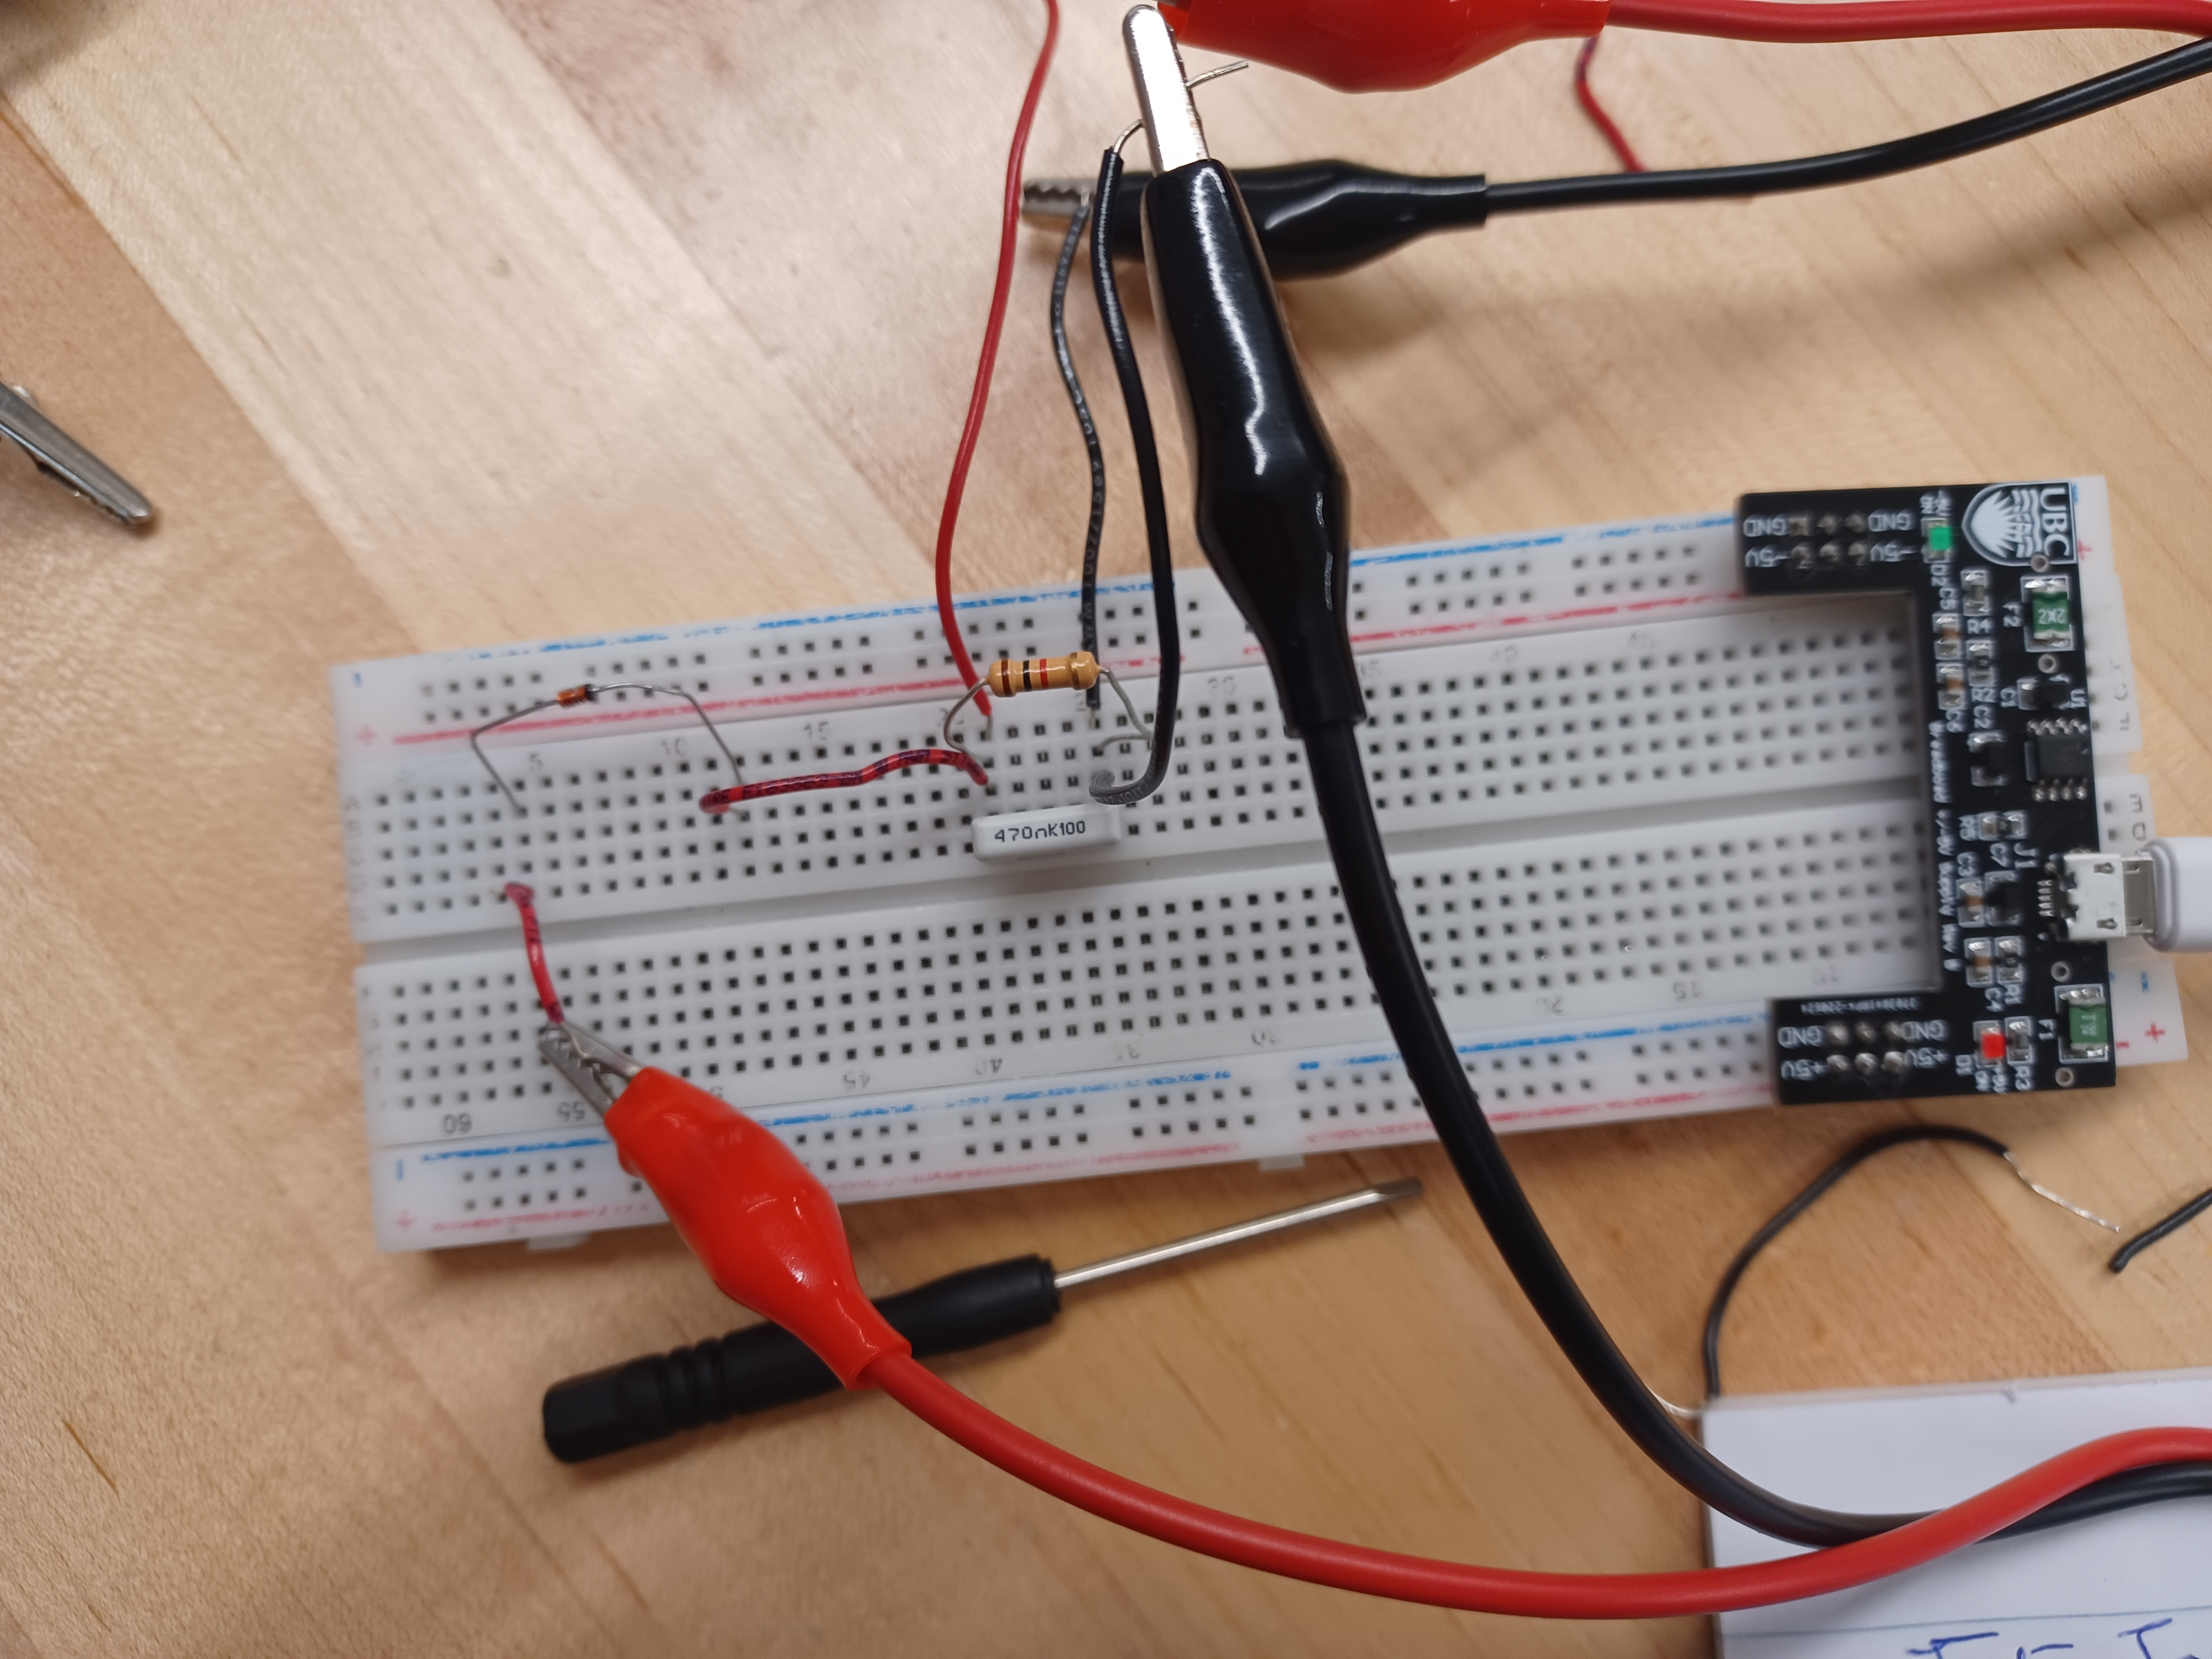

Resistance of the set-resistor (for the example) is $R = 9.91 \pm 0.08$ $k \Omega$ 

In [19]:
resistance, resistance_uncert = record_resistance(9.91)

Resistance: 9.91 +/- 0.08 kOhm


The capacitance of the capacitor is $489.1 \pm 10.3$ $nF$

In [20]:
capacitance, capacitance_uncert = record_capacitance(489.1)

Capacitance: 489.1 +/- 10.3 nF


Given a resistance of $\approx 10$ $k\Omega$, without the capacitor, the response curve $V(t)$ looks like

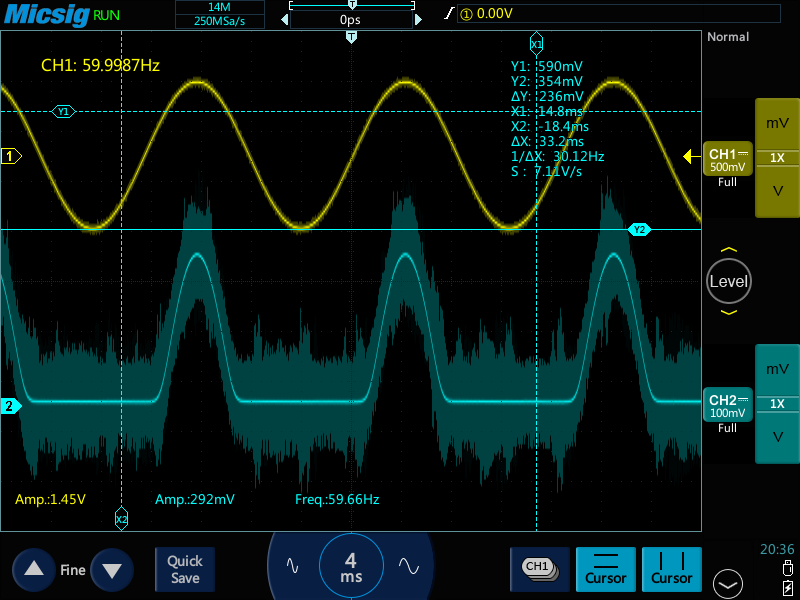

> Explain the observed VR (t) based on the I − V characteristics of the diode.

(Post-Lab) There's a diode, so the only signal's we'll see will be in the forward direction, but in the negative-bias or backward direction, there's (theoretically) infinite resistance, blocking the signal for negative voltages. Therefore, $V_R(t) >= 0$ over the domain.

and with the capacitor, the response curve becomes

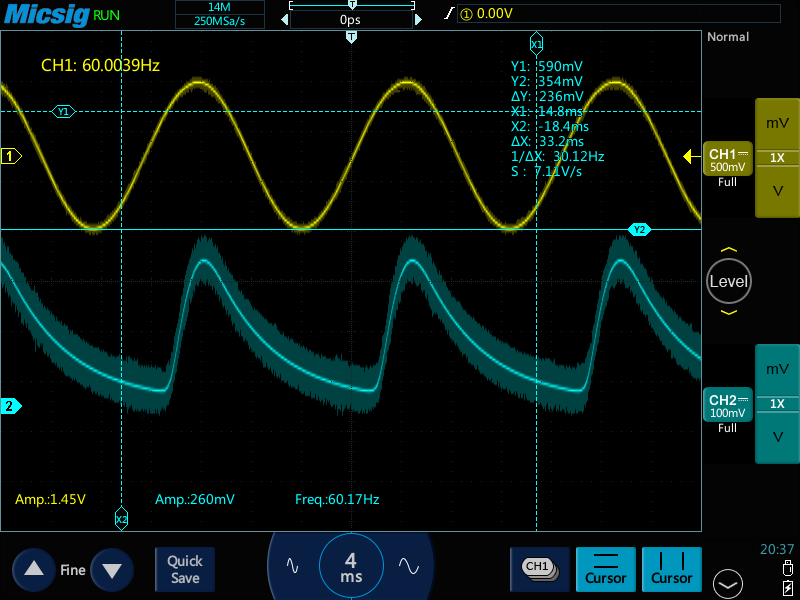

> Explain what you observe.

(Post-Lab) Now, we have a decay curve due to the charging of the capacitor, combined with the blockage of negative-bias currents by the diode, giving this sharktooth-style graph. The larger we make the resistance, the more this graph should become straight-edged and flat.

> Make plots of VR (t) with and without the capacitor and record them in your notebook.

**Without the Capacitor**

In [21]:
gopts = VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS

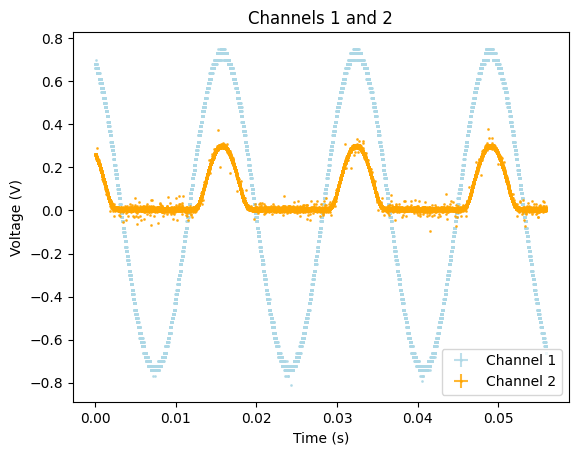

In [22]:
nocap_ch1 = load_channel('data/10k_nocap_ch1.csv')
nocap_ch2 = load_channel('data/10k_nocap_ch2.csv')
plot_channels(nocap_ch1, nocap_ch2, gopts)

(All Post-Lab) **Observations:**
- I was on a time-crunch to finish this lab, so I wasn't able to adjust the axes to get only a singular period of this graph. I'm only making qualitative observations, so it's fine.
- The amplitude of the graph, without a doubt, should decrease with the resistance, and I should find this in the next round with the $1$ $M\Omega$ resistor.

**With the Capacitor**

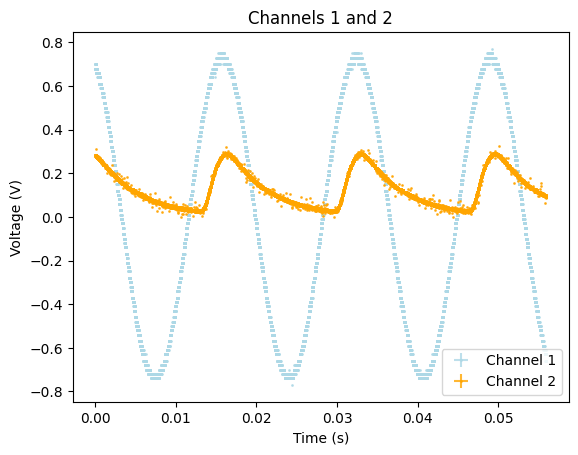

In [23]:
cap_ch1 = load_channel('data/10k_cap_ch1.csv')
cap_ch2 = load_channel('data/10k_cap_ch2.csv')
plot_channels(cap_ch1, cap_ch2, gopts)

(Post-Lab) **Observations:**
- The data seems incredibly noisy.
- The overall trend is as-expected.

### Obtaining $V_{ripple} < 5\%$

To obtain $V_{ripple} < 5\%$, I'll increase the voltage of the resistor to $100$ $k\Omega$ and $1$ $M\Omega$.

**100 k$\Omega$ Resistance**

For a resistance measurement at a maximum precision of $0.1$ [1](https://www.manualslib.com/manual/1596837/Aneng-Q1.html?page=23#manual) $k\Omega$, the DMM uncertainty function $u[R](R)$ is the same as for that at $0.01$ $k\Omega$ (previous),  so the resistance of the $\approx 100$ $k\Omega$ resistor is

$$R = 99.4 \pm 0.5 \text{ } k\Omega.$$

This resistor produces the following response curve:
    
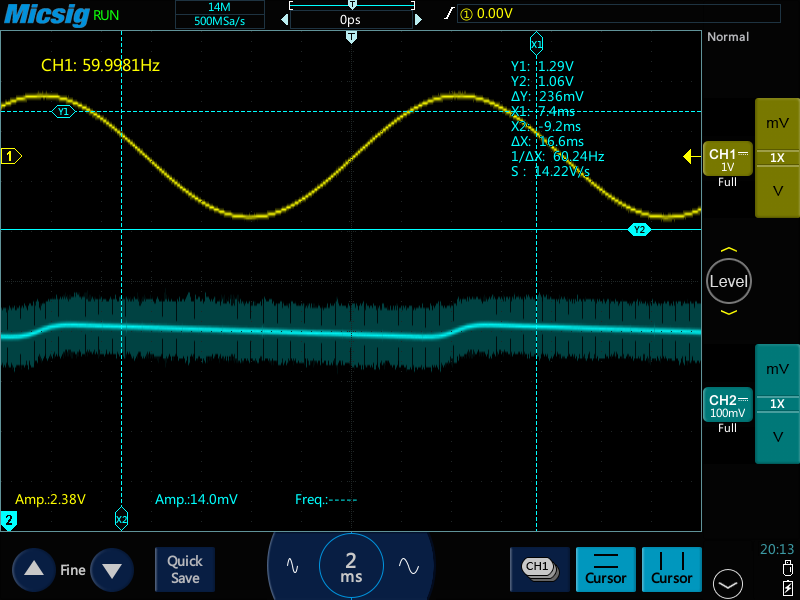

**1 M$\Omega$ Resistance**

For a resistance measurement at a maximum precision of $0.001$ $M\Omega$, the DMM uncertainty function $u[R](R)$ [1](https://www.manualslib.com/manual/1596837/Aneng-Q1.html?page=23#manual) is

$$u[R](R) = R \times 1.5\% + 3 \times 0.001,$$

so the resistance of the $\approx 1$ $M \Omega$ resistor is 

$$R = 0.996 \pm 0.018 \text{ } M\Omega.$$

In [24]:
resistance_1m = 0.996 * 1e6
resistance_uncert_1m = (0.996 * 1.5/100 + 3 * 0.001) * 1e6

This resistor produces the response curve 

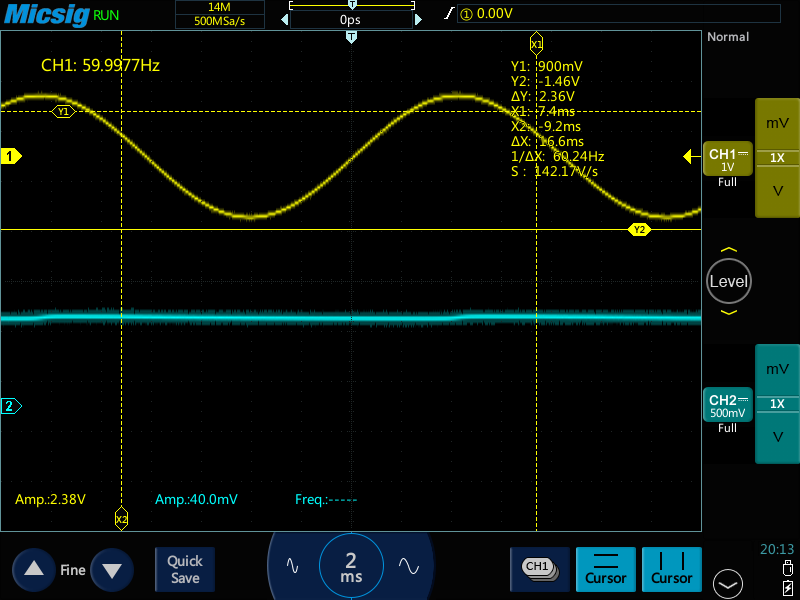

(Post-Lab) **Observation:** As expected the amplitude of the graph decreased significantly as resistance is increased.

Now, we can calculate $V_{ripple}$ as
$$V_{ripple} = \frac{V_{max} - V_{min}}{V_{max} + V_{min}},$$
and obviously, $V_{max} - V_{min}$ is just twice the amplitude of the dataset, so the million-resistor dataset is going to be much better for validating that we've obtained $V_{ripple} < 5\%$. Therefore, I'll perform this calculation on the $1$ $M\Omega$ dataset.

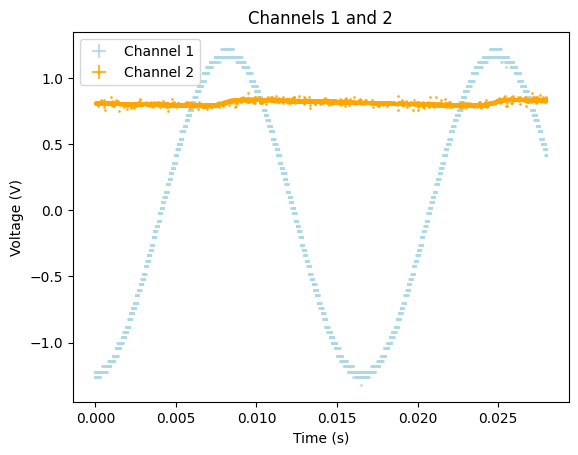

In [25]:
million_ch1 = load_channel('data/milch1.csv')
million_ch2 = load_channel('data/milch2.csv')
plot_channels(million_ch1, million_ch2, gopts)

Then, to eliminate noise, I can pack the signal:

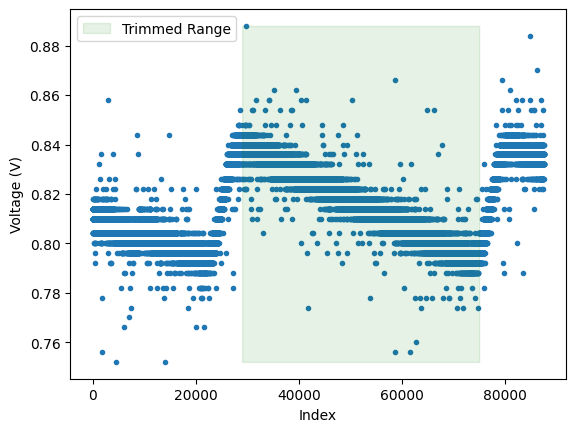

In [26]:
million_ch2_trimmed = trim_dataset(
    million_ch2, 
    trim_range=(29000, 75000), 
    plot=True, 
    graphing_options=gopts
)

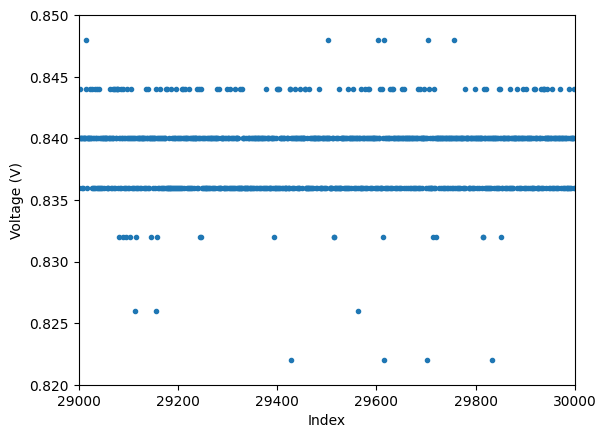

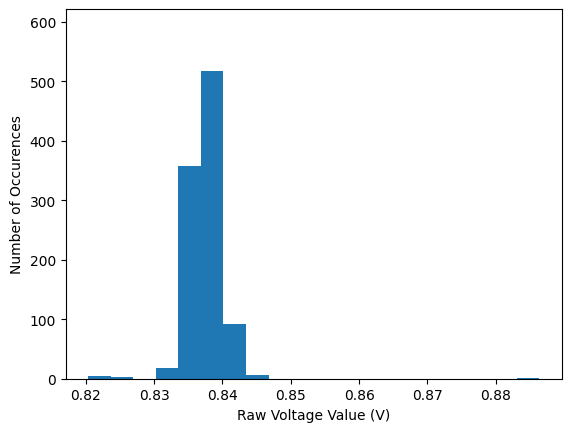

Mean =  0.838774 0.003379485759697771
Standard Deviation (Noise Value) =  0.003379485759697771


In [27]:
std_dev  = calculate_uncertainty(
    (million_ch2.x, million_ch2.y), 
    method="default",                  
    indices_range=(29000, 30000), 
    y_range=(0.82,0.85),
    plot=True, graphing_options=gopts
)

For the packing, because I'm only interested in the minimum and maximum values, I can make the packing number very high to make the endpoints as accurate as possible.

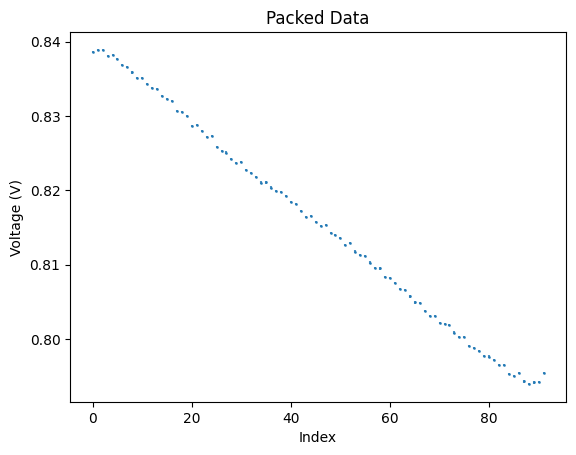

In [38]:
packed_data = pack_data(
    (million_ch2_trimmed.x, million_ch2_trimmed.y), 
    std_dev, p=500, 
    plot=True, graphing_options=gopts
)

Now, I can just select for $V_{max}$ and $V_{min}$, and calculate:

In [39]:
v_max    = max(packed_data.y)
v_min    = min(packed_data.y)
v_ripple = (v_max - v_min) / (v_max + v_min)
print(v_max, v_min, v_ripple * 100)

0.8388880000000001 0.79396 2.7515114695305427


~~(Post Lab) **Observation:** ...and, tough luck. Using $R \approx 1$ $M\Omega$ wasn't good enough, as it yielded $V_{max} = 0.888$ $V$ and $V_{min} = 0.752$ $V$, which produces $V_{ripple} \approx 8.3\%$, which is not what we want. What I should have done here is used an even higher amount of resistance, say $2$ or $3$ $M\Omega$, and that should have brought it far enough down.~~

Using $R \approx 1$ $M\Omega$ completely worked, as after packing the data, it yielded $V_{max} = 0.839$ V and $V_{min} = 0.794$ V, which yields $V_{ripple} = 2.75\%$, which is exactly the range we were hoping for!

> Calculate $\tau$ from your component values. Comment on how $\tau$ compares to the periodicity of the 60Hz signal.

$\tau = RC$ and $u[\tau] = \tau \sqrt{\left(\frac{u[R]}{R}\right)^2 + \left(\frac{u[C]}{C}\right)^2}$, so the time constant for this circuit is $$\tau = 0.487 \pm 0.013 \text{ s}$$

In [30]:
time_constant = resistance_1m * capacitance
time_constant_uncert = time_constant * \
    np.sqrt((resistance_uncert_1m / resistance_1m) ** 2 +
            (capacitance_uncert   / capacitance)   ** 2)

I can roughly-estimate the period of the signal (roughly) from the data:

In [31]:
period = million_ch2.x[75000] - million_ch2.x[29000]
print(period)

0.01472


Therefore, the period is about $0.015$ seconds. (I just realized, I could also have just estimated it as $1/60 \approx 0.017$ seconds. Still, it's the same.) 

So, the time constant is about 33-times the period, and if I had to guess, this is because the period is intrinsically linked to the frequency (so it is invariant by the resistance) but the time constant is increasing with the resistance. 

**Conclusion**

Therefore, the final conlusion to be reached about the mechanics of the rectifier from this is that the resistance increases the decay time while maintaining an invariant period, which results in the characteristic curve we see where the capacitor is unable to charge to full over the period due to the time constant being higher than the period of the signal.